In [4]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train (1).csv


In [37]:
import pandas as pd
data=pd.read_csv("train.csv")

In [38]:
data.head()

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,1,@user123,2024-11-03 08:45:00,Excited to see Kamala Harris leading the Democ...,Kamala Harris,Democratic Party,120,450,positive
1,2,@politicsFan,2024-11-03 09:15:23,Donald Trump's policies are the best for our e...,Donald Trump,Republican Party,85,300,positive
2,3,@greenAdvocate,2024-11-03 10:05:45,Jill Stein's environmental plans are exactly w...,Jill Stein,Green Party,60,200,positive
3,4,@indieVoice,2024-11-03 11:20:10,Robert Kennedy offers a fresh perspective outs...,Robert Kennedy,Independent,40,150,neutral
4,5,@libertyLover,2024-11-03 12:35:55,Chase Oliver's libertarian stance promotes tru...,Chase Oliver,Libertarian Party,30,120,positive


In [39]:
data.isnull().sum()

,0
tweet_id,0
user_handle,0
timestamp,0
tweet_text,0
candidate,0
party,0
retweets,0
likes,0
sentiment,0


In [40]:
data.describe()

,tweet_id,retweets,likes
count,500.000000,500.000000,500.000000
mean,250.500000,64.236000,248.920000
std,144.481833,27.715349,120.562034
min,1.000000,18.000000,85.000000
25%,125.750000,40.000000,150.000000
50%,250.500000,70.000000,225.000000
75%,375.250000,90.000000,340.000000
max,500.000000,120.000000,500.000000


In [48]:
data = data[["tweet_text", "sentiment"]]

In [49]:
data.head()

,tweet_text,sentiment
0,Excited to see Kamala Harris leading the Democ...,positive
1,Donald Trump's policies are the best for our e...,positive
2,Jill Stein's environmental plans are exactly w...,positive
3,Robert Kennedy offers a fresh perspective outs...,neutral
4,Chase Oliver's libertarian stance promotes tru...,positive


In [13]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [50]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

data["tweet_text"] = data["tweet_text"].apply(preprocess_text)

<ipython-input-50-fadc2febb41d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet_text"] = data["tweet_text"].apply(preprocess_text)


In [51]:
data.head()

,tweet_text,sentiment
0,excited to see kamala harris leading the democ...,positive
1,donald trumps policies are the best for our ec...,positive
2,jill steins environmental plans are exactly wh...,positive
3,robert kennedy offers a fresh perspective outs...,neutral
4,chase olivers libertarian stance promotes true...,positive


In [41]:
print("Shape of the dataset:", data.shape)
print("\nColumns in the dataset:\n", data.columns)
print("\nMissing values in each column:\n", data.isnull().sum())
print("\nData types of each column:\n", data.dtypes)

Shape of the dataset: (500, 9)

Columns in the dataset:
 Index(['tweet_id', 'user_handle', 'timestamp', 'tweet_text', 'candidate',
       'party', 'retweets', 'likes', 'sentiment'],
      dtype='object')

Missing values in each column:
 tweet_id       0
user_handle    0
timestamp      0
tweet_text     0
candidate      0
party          0
retweets       0
likes          0
sentiment      0
dtype: int64

Data types of each column:
 tweet_id        int64
user_handle    object
timestamp      object
tweet_text     object
candidate      object
party          object
retweets        int64
likes           int64
sentiment      object
dtype: object


In [42]:
print("\nSentiment Distribution:\n", data["sentiment"].value_counts())


Sentiment Distribution:
 sentiment
positive      328
neutral       126
negative       45
positive        1
Name: count, dtype: int64


<ipython-input-43-7c246d97b485>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=data, palette="viridis")


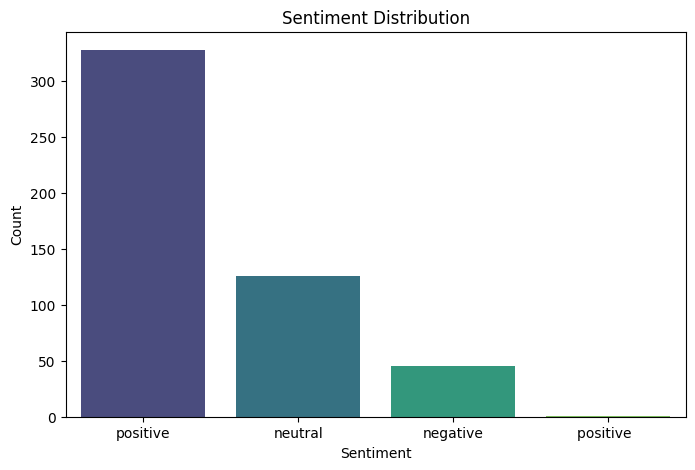

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(x="sentiment", data=data, palette="viridis")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

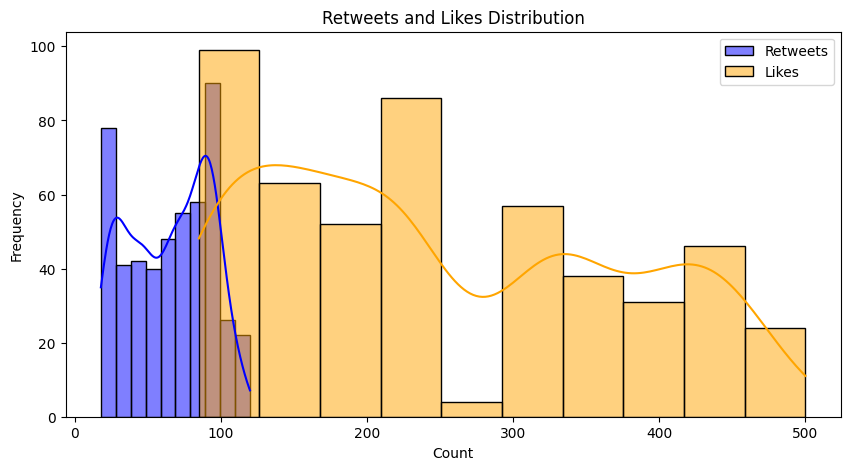

In [44]:
plt.figure(figsize=(10, 5))
sns.histplot(data["retweets"], kde=True, color="blue", label="Retweets", bins=10)
sns.histplot(data["likes"], kde=True, color="orange", label="Likes", bins=10)
plt.title("Retweets and Likes Distribution")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [54]:
X = data["tweet_text"]
y = data["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [56]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [57]:
y_pred = model.predict(X_test_vec)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    negative       0.71      1.00      0.83        10
     neutral       1.00      0.96      0.98        23
    positive       1.00      0.96      0.98        67

    accuracy                           0.96       100
   macro avg       0.90      0.97      0.93       100
weighted avg       0.97      0.96      0.96       100

Accuracy: 0.96


In [58]:
joblib.dump(model, "sentiment_model.pkl")
joblib.dump(vectorizer, "vectorizer_sentiment.pkl")

['vectorizer_sentiment.pkl']

In [59]:
def predict_sentiment(text):
    text = preprocess_text(text)
    text_vec = vectorizer.transform([text])
    return model.predict(text_vec)[0]

# Example usage
example_text =input("Enter the text: ")
print("Predicted Sentiment:", predict_sentiment(example_text))

Enter the text: Jill Stein's solar projects are leading the way in renewable energy
Predicted Sentiment: positive
